# DSC360 - Week 6 - Exercise 6.2

We begin the exercises this week by providing a section for attribution and description.

***

## Exercise 6.2

## Logistic Regression Model for Text Classification

Using this dataset (https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews), build a **logistic regression model** to predict positive or negative feedback based on review text. Be sure to run a test with something random you create (out of sample). Remember: 1 is positive, 0 is negative.

<br>

In the code that follows, libraries for data manipulation, machine learning, and natural language processing were imported. The dataset "amazon_alexa.tsv", that contains Amazon Alexa reviews, was used and read into a pandas DataFrame. A function was created to preprocess the text data contained within and performed text conversion to lowercase, removal of punctuation and non-alphabetic characters, and removal of stopwords. This function cleaned text data to allow for more efficient model training. The TfidfVectorizer function was used to convert cleaned text into numeric features. After numeric conversion, the dataset was split into training and testing sets; this method ensures that the model is trained on a portion of the data and then evaluated on unseen data for assessment of accuracy. A logistic regression model was then instantized and trained. The model was subsequently used to predict sentiment on the test set and the accuracy of the model was calculated. Additional metrics, including a classification report, are printed to assess model performance. The final step involved utilizing the "predict_review" function to predict the sentiment of any new review text.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string
import re

# Load dataset
df = pd.read_csv(r'C:\Users\thefli0\Downloads\archive (1)\amazon_alexa.tsv', sep='\t')

# Display the first few rows to understand dataset
print(df.head())

# Define preprocessing function to clean text
def preprocess_text(text):
    if isinstance(text, str):
        # Lowercase the text
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove digits
        text = re.sub(r'\d+', '', text)
        # Tokenize and remove stopwords
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    else:
        text = ""   
    return text

# Apply preprocessing to review column
df['cleaned_review'] = df['verified_reviews'].apply(preprocess_text)

# Feature extraction with TfidfVectorizer, limit features for simplicity
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Feature extraction with CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['cleaned_review'])

# Define target "feedback" column (1 = positive; 0 = negative)
y = df['feedback']

# Split data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Create and train logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Predict based on test set
y_pred_logistic = logistic_model.predict(X_test_tfidf)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Define function to predict feedback for sample text
def predict_review(review_text):
    cleaned_review = preprocess_text(review_text)
    vectorized_review = tfidf_vectorizer.transform([cleaned_review])
    prediction = logistic_model.predict(vectorized_review)
    return prediction[0]

# Test model with random sample
test_reviews = [
    "I love using this device, it makes everything easier!",
    "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",
    "The sound quality is amazing and it connects seamlessly to my phone.",
    "Stopped working after just two days. Waste of money!"
]

for review in test_reviews:
    prediction = predict_review(review)
    print(f"Review: '{review}'")
    if prediction == 1:
        print("Predicted Feedback: Positive")
    else:
        print("Predicted Feedback: Negative")
    print("\n")

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
Accuracy: 0.9095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.95      0.51      0.49       630
weighted avg       0.92      0.9

***

## Summarizing Model Performance

At the end of Chapter 5, the author uses a custom-built class to summarize model performance. This class doesn't actually exist (from the author) but you can make it a reality. Using the object you have from mnb_predictions, create something similar to the output on page 335. Feel free (but not obligated) to venture further into the label names and numbers (page 336) and confusion matrix (page 337).

<br>

The code that follows begins with importing the necessary Python libraries. A Naive Bayes classifier was then created and used to store the nb_model. The model was then trained, using the "fit()" method, on the training data. The trained model aimed to predict the label of the test dataset, utilizing the "predict()" method, and subsequent predictions were stored in nb_predictions. After training, unique classes in the test data were identified and sorted for further report generation and matrix construction. A classification report with performance metrics was generated and formatted as a DataFrame for enhanced readability. While not explicitly required, a confusion matrix visualization was created that displayed a heatmap that displays the true and predicted labels for the dataset.

Naive Bayes Classification Report:
               precision    recall  f1-score     support
Negative       0.736842  0.241379  0.363636   58.000000
Positive       0.927987  0.991259  0.958580  572.000000
accuracy       0.922222  0.922222  0.922222    0.922222
macro avg      0.832415  0.616319  0.661108  630.000000
weighted avg   0.910389  0.922222  0.903807  630.000000


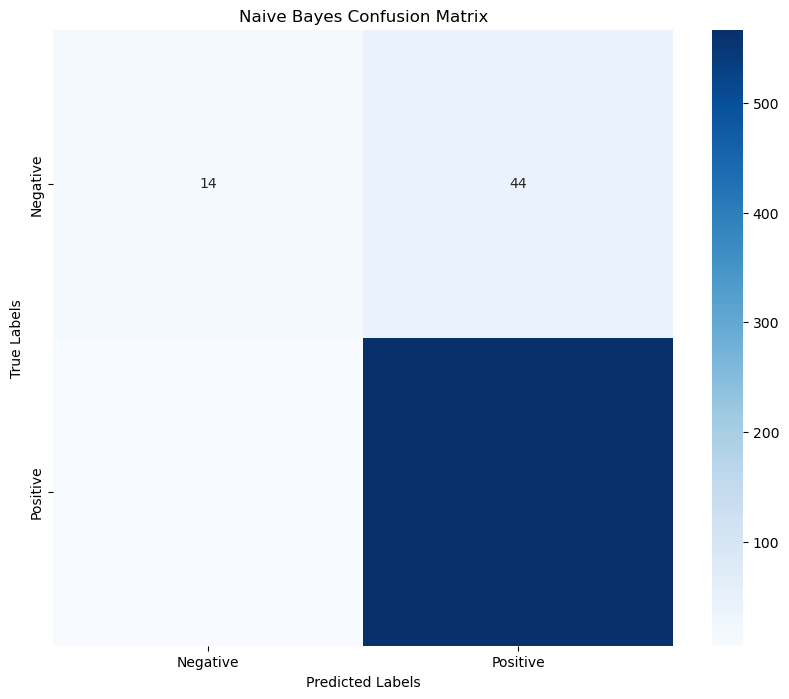

In [2]:
# Import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train_count)

nb_predictions = nb_model.predict(X_test_count)

unique_classes = sorted(y_test_count.unique())
nb_report = classification_report(y_test_count, nb_predictions, target_names=['Negative', 'Positive'], output_dict=True)
nb_report_df = pd.DataFrame(nb_report).transpose()

print("Naive Bayes Classification Report:\n", nb_report_df)

nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()